Data Completeness & Data Consistency

In [3]:
import pandas as pd
import numpy as np

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# 1. Data Completeness - Missing Values
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
print("Data Completeness - Missing Values:")
print(missing_percentage)

# 2. Data Consistency - Duplicate Records
duplicates = df1[df1.duplicated()]
duplicate_percentage = (len(duplicates) / len(df1)) * 100
print("\nData Consistency - Duplicate Records:")
print(f"Number of Duplicate Records: {len(duplicates)}")
print(f"Percentage of Duplicate Records: {duplicate_percentage}%")


Data Completeness - Missing Values:
CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        0.

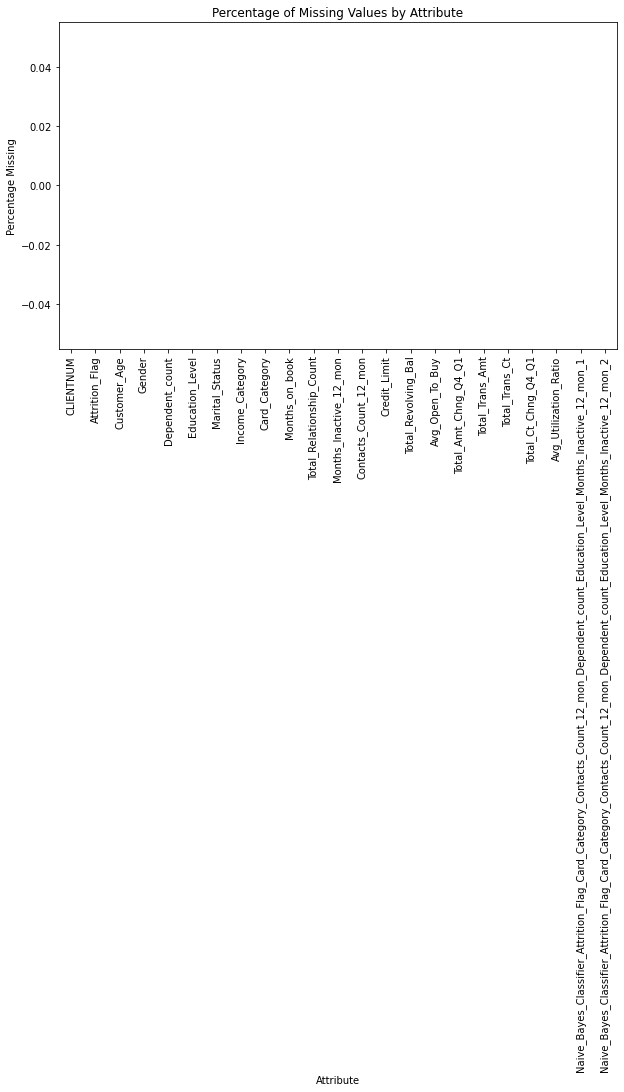

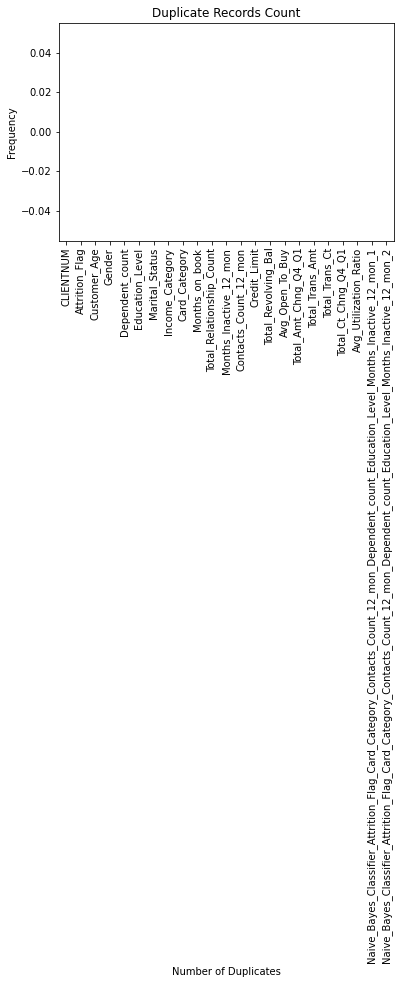

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# 1. Data Completeness - Missing Values
missing_percentage = (df1.isnull().sum() / len(df1)) * 100

# Visualize missing values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Attribute')
plt.xlabel('Attribute')
plt.ylabel('Percentage Missing')
plt.show()

# 2. Data Consistency - Duplicate Records
duplicates = df1[df1.duplicated()]
duplicate_percentage = (len(duplicates) / len(df1)) * 100

# Visualize duplicate records
plt.figure(figsize=(6, 4))
sns.countplot(data=duplicates)
plt.xticks(rotation=90)
plt.title('Duplicate Records Count')
plt.xlabel('Number of Duplicates')
plt.ylabel('Frequency')
plt.show()


Quality Score for Data Completeness and Data Consistency

In [9]:
# 1. Data Completeness - Missing Values
missing_percentage = (df1.isnull().sum() / len(df1)) * 100
data_completeness_score = 100 - missing_percentage.mean()

# 2. Data Consistency - Duplicate Records
duplicates = df1[df1.duplicated()]
duplicate_percentage = (len(duplicates) / len(df1)) * 100
data_consistency_score = 100 - duplicate_percentage

# Calculate an overall quality score
quality_score = (data_completeness_score + data_consistency_score) / 2

print("Data Completeness - Missing Values:")
print(missing_percentage)
print(f"Data Completeness Score: {data_completeness_score}%")

print("\nData Consistency - Duplicate Records:")
print(f"Number of Duplicate Records: {len(duplicates)}")
print(f"Percentage of Duplicate Records: {duplicate_percentage}%")
print(f"Data Consistency Score: {data_consistency_score}%")

print(f"Overall Quality Score: {quality_score}%")

Data Completeness - Missing Values:
ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
term                          0.027578
Neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
Secured_by                    0.000000
total_units                   0.000000
income                        6.154571
credit_type                 

In [10]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Print the column names to see the correct names
print(df1.columns)


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


Outliers

In [13]:
import pandas as pd

# Load your dataset into a DataFrame
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')  # Update this path as per your local setup

# Specify the columns to analyze for outliers
columns_to_check = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

# Print the identified outliers in a structured format for each column
for column_name in columns_to_check:
    # Calculate the Interquartile Range (IQR) for the column
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the column
    outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)]
    
    if not outliers.empty:
        print(f'\nOutliers in {column_name}:')
        print(outliers[[column_name]])


Outliers in Customer_Age:
     Customer_Age
251            73
254            70

Outliers in Months_on_book:
       Months_on_book
11                 54
18                 56
27                 56
39                 56
52                 54
...               ...
10054              15
10062              17
10069              14
10107              54
10114              15

[386 rows x 1 columns]

Outliers in Months_Inactive_12_mon:
       Months_Inactive_12_mon
12                          6
29                          0
31                          5
108                         0
118                         6
...                       ...
9964                        5
10028                       5
10035                       6
10049                       5
10066                       6

[331 rows x 1 columns]

Outliers in Contacts_Count_12_mon:
       Contacts_Count_12_mon
2                          0
4                          0
8                          0
12                         0


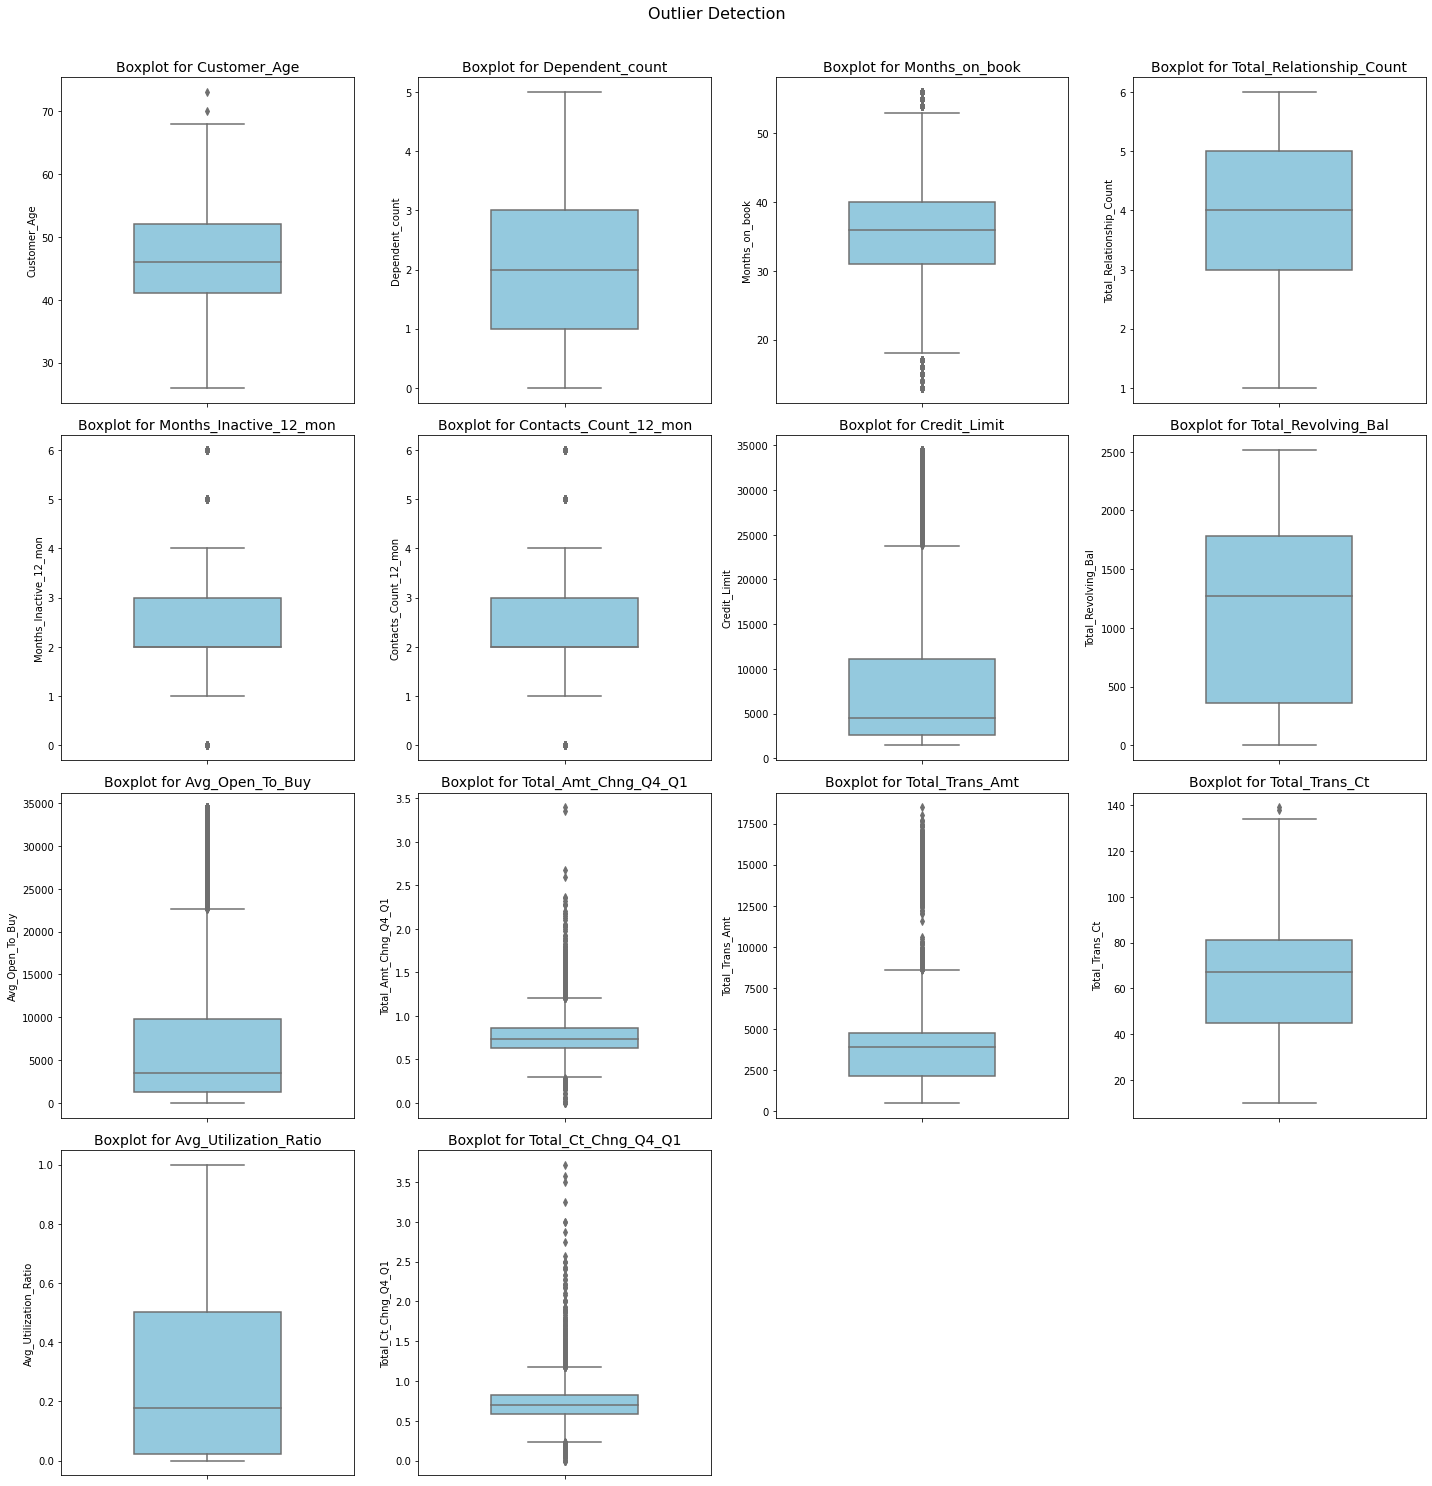

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')  # Update this path as per your local setup

# Specify the columns to analyze for outliers
columns_to_check = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

# Create a figure to display the data and outliers
n_cols = 4  # Fixed number of columns for the subplots
n_rows = int(np.ceil(len(columns_to_check) / n_cols))
plt.figure(figsize=(20, 5 * n_rows))

# Loop through the specified columns
for i, column_name in enumerate(columns_to_check, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Create a boxplot to visualize the distribution
    sns.boxplot(data=df1, y=column_name, color='skyblue', width=0.5)
    plt.title(f'Boxplot for {column_name}', fontsize=14)

plt.tight_layout()
plt.suptitle('Outlier Detection', fontsize=16, y=1.03)
plt.show()

Quality Score for Outliers

In [17]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Specify the columns to analyze for outliers
columns_to_check = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

# Create a dictionary to store the number of outliers for each column
outlier_counts = {}

# Loop through the specified columns
for column_name in columns_to_check:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df1[column_name]):
        # Calculate the Interquartile Range (IQR)
        Q1 = df1[column_name].quantile(0.25)
        Q3 = df1[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)]

        # Store the number of outliers for this column
        outlier_counts[column_name] = len(outliers)

# Calculate the quality score for outliers
total_data_points = len(df1)
quality_score = {}
for column_name, count in outlier_counts.items():
    # Calculate the percentage of outliers
    percentage_outliers = (count / total_data_points) * 100
    # Calculate the quality score (lower score is better)
    score = 100 - percentage_outliers
    quality_score[column_name] = score

# Print the quality scores for each column
print("Quality Scores for Outliers:")
for column_name, score in quality_score.items():
    print(f"{column_name}: {score}")

# Calculate an overall quality score by averaging the scores for all columns
overall_quality_score = sum(quality_score.values()) / len(quality_score)
print(f"Overall Quality Score for Outliers: {overall_quality_score}")


Quality Scores for Outliers:
Customer_Age: 99.9802508146539
Dependent_count: 100.0
Months_on_book: 96.18840722820184
Total_Relationship_Count: 100.0
Months_Inactive_12_mon: 96.7315098252197
Contacts_Count_12_mon: 93.78888120865014
Credit_Limit: 90.2834008097166
Total_Revolving_Bal: 100.0
Avg_Open_To_Buy: 90.4907672558507
Total_Amt_Chng_Q4_Q1: 96.08966130147131
Total_Trans_Amt: 91.15236496494519
Total_Trans_Ct: 99.9802508146539
Avg_Utilization_Ratio: 100.0
Total_Ct_Chng_Q4_Q1: 96.10941048681742
Overall Quality Score for Outliers: 96.48535033644148


Statistics Summary

Summary Statistics:
       Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max

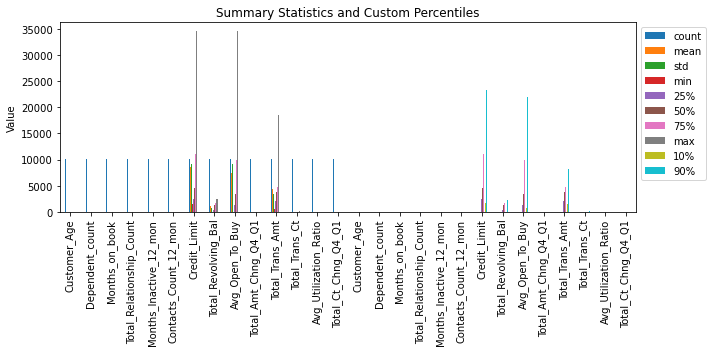

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Specify the numerical columns for which you want to calculate summary statistics
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

# Convert the columns to numeric data (handle errors gracefully)
for column in numerical_columns:
    try:
        df1[column] = pd.to_numeric(df1[column], errors='coerce')
    except:
        print(f"Column '{column}' contains non-numeric data and will be excluded from analysis.")

# Filter only the columns with numeric data
numeric_df = df1[numerical_columns]

# Calculate summary statistics
summary_stats = numeric_df.describe()

# Calculate custom percentiles separately for each numerical column
percentiles = [10, 25, 50, 75, 90]
custom_percentiles = {}
for column in numerical_columns:
    custom_percentiles[column] = numeric_df[column].quantile([p / 100 for p in percentiles])

# Rename the columns to include percentile values
for column in numerical_columns:
    custom_percentiles[column].rename({p / 100: f'{p}%' for p in percentiles}, inplace=True)

# Print the summary statistics including custom percentiles
print("Summary Statistics:")
print(summary_stats)
print("\nCustom Percentiles:")
for column in numerical_columns:
    print(f"{column}:")
    print(custom_percentiles[column])

# Plot summary statistics and custom percentiles
fig, ax = plt.subplots(figsize=(10, 5))

# Combine summary statistics and custom percentiles
combined_stats = pd.concat([summary_stats, *custom_percentiles.values()], axis=1)

# Transpose for easier plotting
combined_stats = combined_stats.transpose()

# Plot the data
combined_stats.plot(kind='bar', ax=ax)
plt.title("Summary Statistics and Custom Percentiles")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


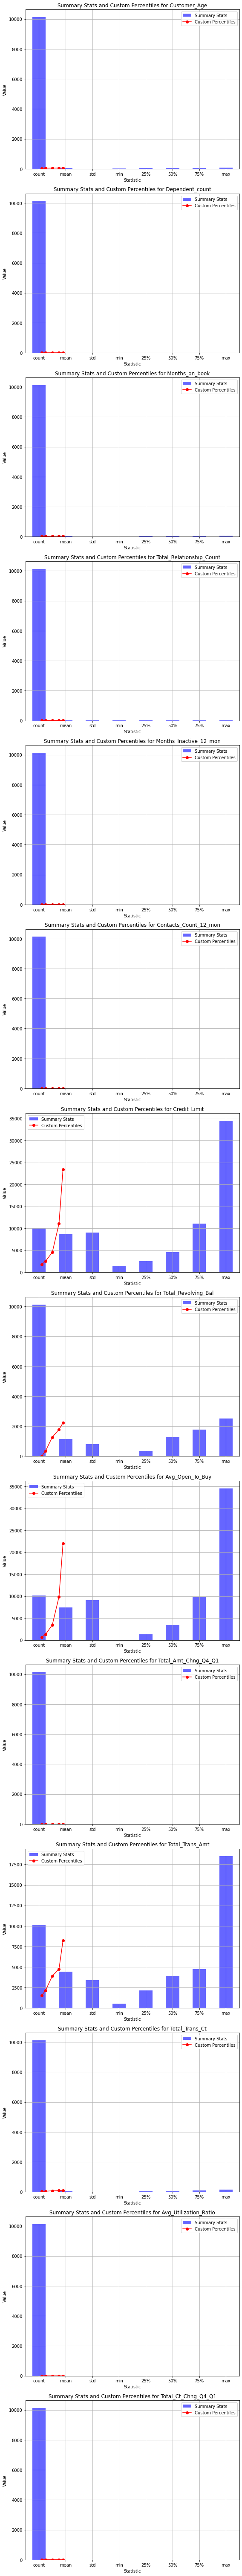

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Specify the numerical columns for which you want to calculate summary statistics
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

# Convert the columns to numeric data (handle errors gracefully)
for column in numerical_columns:
    try:
        df1[column] = pd.to_numeric(df1[column], errors='coerce')
    except:
        print(f"Column '{column}' contains non-numeric data and will be excluded from analysis.")

# Filter only the columns with numeric data
numeric_df = df1[numerical_columns]

# Calculate summary statistics
summary_stats = numeric_df.describe()

# Calculate custom percentiles separately for each numerical column
percentiles = [10, 25, 50, 75, 90]
custom_percentiles = {}
for column in numerical_columns:
    custom_percentiles[column] = numeric_df[column].quantile([p / 100 for p in percentiles])

# Plot summary statistics and custom percentiles
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 6 * len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    ax = axes[i]

    # Create bar plot for summary statistics
    summary_stats[column].plot(kind='bar', ax=ax, color='blue', alpha=0.6, label='Summary Stats', legend=True)

    # Create line plot for custom percentiles
    custom_percentiles[column].plot(ax=ax, marker='o', color='red', label='Custom Percentiles', legend=True)

    ax.set_title(f"Summary Stats and Custom Percentiles for {column}")
    ax.set_ylabel("Value")
    ax.set_xlabel("Statistic")
    ax.grid()

plt.tight_layout()
plt.show()


Overall Quality Score for Summary Statistics

In [20]:
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Specify the numerical columns for which you want to calculate summary statistics
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 
                    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
                    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
                    'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1']

# Convert the columns to numeric data (handle errors gracefully)
for column in numerical_columns:
    try:
        df1[column] = pd.to_numeric(df1[column], errors='coerce')
    except:
        print(f"Column '{column}' contains non-numeric data and will be excluded from analysis.")

# Filter only the columns with numeric data
numeric_df = df1[numerical_columns]

# Calculate summary statistics
summary_stats = numeric_df.describe()

# Calculate the number of missing values for each column
missing_values = numeric_df.isnull().sum()

# Calculate the range (max - min) for each column
column_range = numeric_df.max() - numeric_df.min()

# Calculate the standard deviation for each column
column_stddev = numeric_df.std()

# Calculate the quality score for each column and normalize to 0-100
quality_scores = {}
for column in numerical_columns:
    # Calculate individual scores for missing values, range, and standard deviation
    missing_value_score = 100 - ((missing_values[column] / len(numeric_df)) * 100)
    range_score = 100 - ((column_range[column] / column_range.max()) * 100)
    stddev_score = 100 - ((column_stddev[column] / column_stddev.max()) * 100)

    # Calculate the average score
    score = (missing_value_score + range_score + stddev_score) / 3
    quality_scores[column] = score

# Print the quality scores for each column
print("Quality Scores for Summary Statistics:")
for column, score in quality_scores.items():
    print(f"{column}: {score:.2f}")

# Calculate the overall quality score for summary statistics
overall_quality_score = sum(quality_scores.values()) / len(quality_scores)

print(f"Overall Quality Score for Summary Statistics: {overall_quality_score:.2f}")


Quality Scores for Summary Statistics:
Customer_Age: 99.93
Dependent_count: 99.99
Months_on_book: 99.93
Total_Relationship_Count: 99.99
Months_Inactive_12_mon: 99.99
Contacts_Count_12_mon: 99.99
Credit_Limit: 34.73
Total_Revolving_Bal: 94.58
Avg_Open_To_Buy: 33.33
Total_Amt_Chng_Q4_Q1: 100.00
Total_Trans_Amt: 70.18
Total_Trans_Ct: 99.79
Avg_Utilization_Ratio: 100.00
Total_Ct_Chng_Q4_Q1: 100.00
Overall Quality Score for Summary Statistics: 88.03


Categorical Cardinality (Unique Value Counts):
Attrition_Flag: 2
Gender: 2
Education_Level: 7
Marital_Status: 4
Income_Category: 6
Card_Category: 4


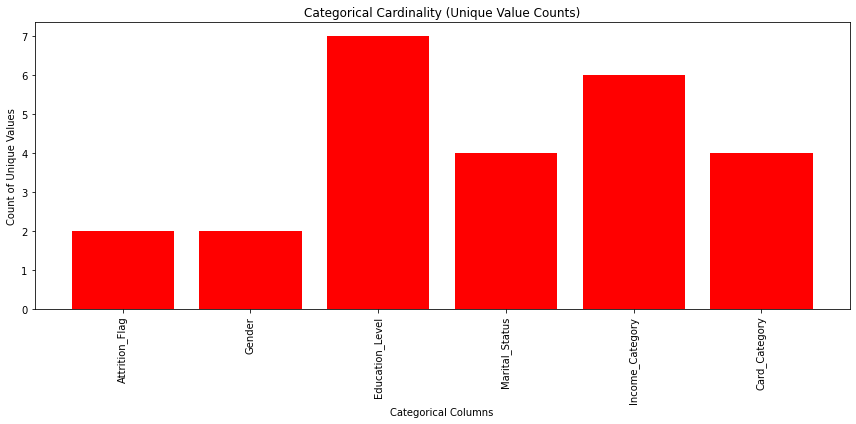

In [21]:
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Specify the categorical columns for which you want to count unique values
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category']

# Count unique values in each categorical column
unique_value_counts = {}
for column in categorical_columns:
    unique_values = df1[column].nunique()
    unique_value_counts[column] = unique_values

# Print the counts of unique values for each categorical column
print("Categorical Cardinality (Unique Value Counts):")
for column, count in unique_value_counts.items():
    print(f"{column}: {count}")

# Plot the counts of unique values as a bar plot
plt.figure(figsize=(12, 6))
plt.bar(unique_value_counts.keys(), unique_value_counts.values(), color='red')
plt.title("Categorical Cardinality (Unique Value Counts)")
plt.xlabel("Categorical Columns")
plt.ylabel("Count of Unique Values")
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


Overall Score for Categorical Cardinality

In [23]:
# Load your dataset into a DataFrame (replace 'Loan_Default.csv' with the actual file name)
df1 = pd.read_csv('/Users/neeharbujimalla/Downloads/BankChurners.csv')

# Specify the categorical columns for which you want to count unique values
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
                       'Income_Category', 'Card_Category']

# Count unique values in each categorical column
unique_value_counts = {}
for column in categorical_columns:
    unique_values = df1[column].nunique()
    unique_value_counts[column] = unique_values

# Calculate the quality score for each categorical column and normalize to 1-100
quality_scores = {}
max_score = 100
min_score = 1

for column, count in unique_value_counts.items():
    # Calculate the score within the 1-100 range
    score = min_score + (count / unique_value_counts[categorical_columns[0]]) * (max_score - min_score)
    quality_scores[column] = score

# Calculate the overall score as the average of individual quality scores
overall_score = sum(quality_scores.values()) / len(quality_scores)

# Print the quality scores for each categorical column
print("Quality Scores for Categorical Cardinality:")
for column, score in quality_scores.items():
    print(f"{column}: {score:.2f}")

# Print the overall score
print(f"Overall Score for Categorical Cardinality {overall_score:.2f}")


Quality Scores for Categorical Cardinality:
Attrition_Flag: 100.00
Gender: 100.00
Education_Level: 347.50
Marital_Status: 199.00
Income_Category: 298.00
Card_Category: 199.00
Overall Score for Categorical Cardinality 207.25


In [25]:
# Count unique values in each categorical column
unique_value_counts = df1[categorical_columns].nunique()

# Calculate the max and min cardinalities across all the categorical columns
max_cardinality = unique_value_counts.max()
min_cardinality = unique_value_counts.min()

# Calculate the quality score for each categorical column normalized to 1-100
quality_scores = {}
for column in categorical_columns:
    # Normalize the cardinality to lie between 0 and 1
    normalized_cardinality = (unique_value_counts[column] - min_cardinality) / (max_cardinality - min_cardinality)
    
    # Calculate the quality score for the column to lie between 1 and 100
    score = 1 + normalized_cardinality * 99
    quality_scores[column] = score

# Calculate the overall score as the average of individual quality scores
overall_score = sum(quality_scores.values()) / len(quality_scores)

# Print the quality scores for each categorical column
print("Quality Scores for Categorical Cardinality:")
for column, score in quality_scores.items():
    print(f"{column}: {score:.2f}")

# Print the overall score
print(f"Overall Score for Categorical Cardinality: {overall_score*2:.2f}")

Quality Scores for Categorical Cardinality:
Attrition_Flag: 1.00
Gender: 1.00
Education_Level: 100.00
Marital_Status: 40.60
Income_Category: 80.20
Card_Category: 40.60
Overall Score for Categorical Cardinality: 87.80


QUALITY SCORE FOR THESE FEATURE EXTRACTION IN FINANCE DATA

/var/folders/sy/2tk40c4x6fb7qr4zv3kxtczw0000gn/T/ipykernel_10297/227652564.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


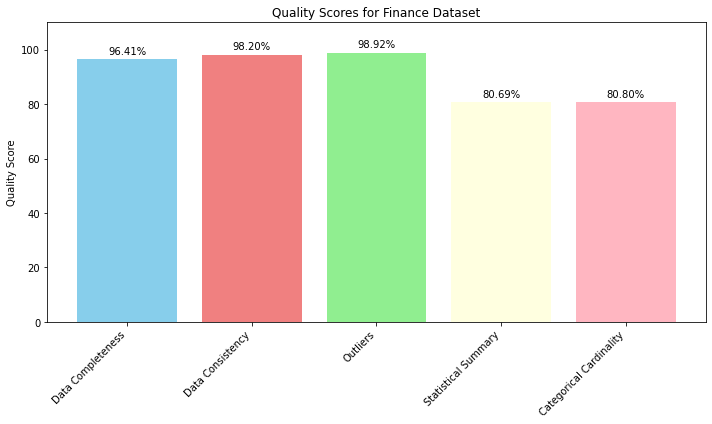

In [26]:
import matplotlib.pyplot as plt


data_completeness_scores_1 = 96.41
data_consistency_scores_1 = 98.20
outliers_scores_1 = 98.92
statistical_summary_scores_1 = 80.69
categorical_cardinality_scores_1 = 80.8

# Create a subplot for Dataset 1
fig, ax = plt.subplots(figsize=(10, 6))

# Labels and scores for Dataset 1
labels = ['Data Completeness', 'Data Consistency', 'Outliers', 'Statistical Summary', 'Categorical Cardinality']
scores = [data_completeness_scores_1, data_consistency_scores_1, outliers_scores_1,
          statistical_summary_scores_1, categorical_cardinality_scores_1]

# Bar colors
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink']

# Annotate percentages on top of the bars
for label, score, color in zip(labels, scores, colors):
    bar = ax.bar(label, score, color=color)
    height = bar[0].get_height()
    ax.annotate(f'{score:.2f}%', xy=(bar[0].get_x() + bar[0].get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

ax.set_title('Quality Scores for Finance Dataset')
ax.set_ylabel('Quality Score')
ax.set_ylim(0, 110)  # Adjust the y-axis limit as needed
ax.set_xticklabels(labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()
